<a href="https://colab.research.google.com/github/AftabQuant/Deep-Learning/blob/main/Cat_vs_Dog_Classification_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import zipfile
import tensorflow as tf
import numpy as np
import pandas as pd
import warnings

warnings.filterwarnings("ignore")

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense,Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from keras.utils import image_dataset_from_directory

In [3]:
zip_ref = zipfile.ZipFile('/content/archive.zip', 'r')
zip_ref.extractall('data')
zip_ref.close()

## **Generator Func**

In [4]:
class_labels = {
    0: 'Cat',
    1: 'Dog'
}

In [5]:
def create_cnn_model():
    model = Sequential([
        Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape = (150,150,3)),
        MaxPooling2D(pool_size=(2, 2)),

        Conv2D(64, kernel_size=(3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),

        Conv2D(128, kernel_size=(3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),

        Flatten(),

        Dense(128, activation='relu'),
        Dropout(0.2),

        Dense(64, activation='relu'),
        Dropout(0.2),

        Dense(32, activation='relu'),
        Dropout(0.2),

        Dense(1, activation='sigmoid')
    ])

    model.compile(
        loss='binary_crossentropy',
        optimizer='adam',
        metrics=['accuracy']
    )

    return model

In [6]:
model = create_cnn_model()

In [7]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     4,735,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,838,721 (18.46 MB)

 Trainable params: 4,838,721 (18.46 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
train_dataset = image_dataset_from_directory(
    '/content/data/dataset/training_set',
    image_size=(150, 150),
    batch_size=32,
    label_mode='binary'
)

Found 8000 files belonging to 2 classes.


In [9]:
test_dataset = image_dataset_from_directory(
    '/content/data/dataset/test_set',
    image_size=(150, 150),
    batch_size=32,
    label_mode='binary'
)

Found 2000 files belonging to 2 classes.


In [10]:
def process(image, label):
    image = tf.cast(image / 255.0, tf.float32)
    return image, label

train_dataset = train_dataset.map(process)
test_dataset = test_dataset.map(process)

In [11]:
history = model.fit(train_dataset, epochs=10, validation_data=test_dataset)

Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 20s 49ms/step - accuracy: 0.5215 - loss: 0.7108 - val_accuracy: 0.6025 - val_loss: 0.6691
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 9s 37ms/step - accuracy: 0.6230 - loss: 0.6495 - val_accuracy: 0.6915 - val_loss: 0.6042
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 10s 40ms/step - accuracy: 0.6928 - loss: 0.5943 - val_accuracy: 0.6995 - val_loss: 0.5735
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 10s 39ms/step - accuracy: 0.7388 - loss: 0.5348 - val_accuracy: 0.7310 - val_loss: 0.5338
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 10s 39ms/step - accuracy: 0.7848 - loss: 0.4658 - val_accuracy: 0.7380 - val_loss: 0.5297
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 10s 39ms/step - accuracy: 0.8132 - loss: 0.4015 - val_accuracy: 0.7560 - val_loss: 0.5594
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 9s 35ms/step - accuracy: 0.8565 - loss: 0.3383 - val_accuracy: 0.7505 - val_loss: 0.5738
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.8989 - loss: 0.2446 - va

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 0, 'Epoch')

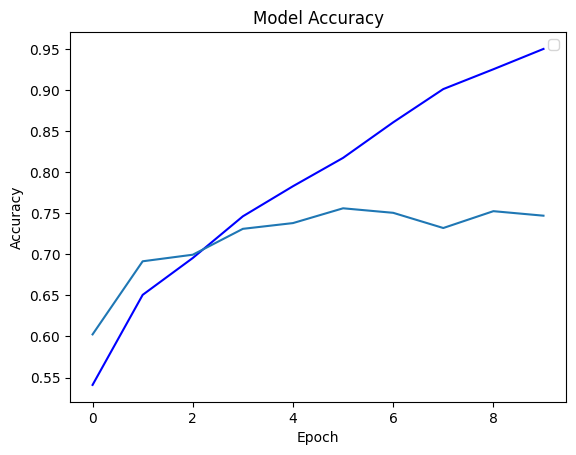

In [14]:
plt.plot(history.history['accuracy'], color='blue')
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.legend()
plt.xlabel('Epoch')

Text(0.5, 0, 'Epoch')

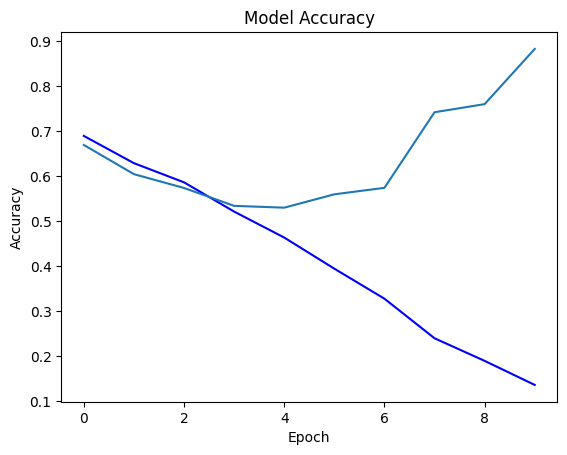

In [15]:
plt.plot(history.history['loss'], color='blue')
plt.plot(history.history['val_loss'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')